In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('Not_fully_clean.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50367 entries, 0 to 50366
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50367 non-null  int64  
 1   Country        50367 non-null  object 
 2   IDSTUD         50367 non-null  int64  
 3   ASBH02A        41503 non-null  object 
 4   ASBH02B        16269 non-null  object 
 5   ASBH03A        41179 non-null  object 
 6   ASBH04         27142 non-null  float64
 7   ASBH15A        23316 non-null  float64
 8   ASBH15B        20508 non-null  float64
 9   ASBH16         40406 non-null  object 
 10  ASBH17A        15016 non-null  float64
 11  ASBH17B        12722 non-null  float64
 12  ASBH18AA       40161 non-null  object 
 13  ASBH18AB       35131 non-null  object 
 14  ASBG01         49428 non-null  object 
 15  ASBG03         36188 non-null  float64
 16  ASBG10C        35913 non-null  float64
 17  ASBG10D        35842 non-null  float64
 18  ASBG10

In [6]:
df = df.drop('AASBG03',axis=1)

In [10]:
df = df.drop('Unnamed: 0',axis=1)

In [13]:
mean_of_belonging = df.groupby('ASBH02A').agg({'ASBG10C': 'mean'})
print(mean_of_belonging)

          ASBG10C
ASBH02A          
9        1.428571
No       1.456111
Yes      1.420919


In [14]:
# Calculate correlation between two columns
correlation = df['ASDAGE'].corr(df['MINAGEARRIVAL'])
print(correlation)

0.1474808306134366


In [15]:
df.groupby("rounded_ages")["MINAGEARRIVAL"].mean()

rounded_ages
7.0          NaN
8.0     0.000000
9.0     1.781250
10.0    2.431227
11.0    3.993377
12.0    5.413043
13.0    5.875000
14.0    2.800000
99.0    8.000000
Name: MINAGEARRIVAL, dtype: float64

In [20]:
pivot_df_bornincountryxreadingscore = df.pivot_table(values='ASRREA01', index='Country', columns=['ASBH02A'], aggfunc='mean')
pivot_df_bornincountryxreadingscore

ASBH02A,9,No,Yes
Country,,,
Austria,NaN,502.126337,537.309932
Egypt,NaN,371.054071,383.672197
France,NaN,497.629560,522.971730
Germany,525.967849,493.944351,548.409881
Iran,367.597747,430.471736,423.779609
Jordan,NaN,385.794061,371.076867
Netherlands,NaN,533.334693,545.331998
Sweden,NaN,513.689949,566.231783
Turkey,479.968049,456.806291,508.673668


In [21]:
pivot_df_age_arrivalxreadingscore = df.pivot_table(values='ASRREA01', index='Country', columns=['ASBH02A','MINAGEARRIVAL'], aggfunc='mean')
pivot_df_age_arrivalxreadingscore

ASBH02A                No                                    
MINAGEARRIVAL         0.0         3.0         6.0         8.0
Country                                                      
Germany        511.920992  487.089448  488.056311  491.641326
Iran           409.731261  440.530449  464.494811  450.532497
Turkey         462.131911  437.054468  472.255189  452.950989

In [28]:
pivot_df_multiplexreadingscore = df.pivot_table(values=['ASRREA01','ASRREA02',
 'ASRREA03',
 'ASRREA04',
 'ASRREA05',
 'ASRLIT01',
 'ASRLIT02',
 'ASRLIT03',
 'ASRLIT04',
 'ASRLIT05',
 'ASRINF01',
 'ASRINF02',
 'ASRINF03',
 'ASRINF04',
 'ASRINF05',
 'ASRIIE01',
 'ASRIIE02',
 'ASRIIE03',
 'ASRIIE04',
 'ASRIIE05',
 'ASRRSI01',
 'ASRRSI02',
 'ASRRSI03',
 'ASRRSI04',
 'ASRRSI05'], index=['Country','ASBH02A'], aggfunc='mean')
pivot_df_multiplexreadingscore

ASRIIE01    ASRIIE02    ASRIIE03    ASRIIE04  \
Country     ASBH02A                                                   
Austria     No       501.445941  497.509870  497.003904  496.295325   
            Yes      534.842244  533.711357  533.087264  533.433242   
Egypt       No       380.239904  378.807461  369.667864  377.573304   
            Yes      383.598790  382.061023  381.942312  382.036982   
France      No       492.222485  494.421637  491.149082  494.454796   
            Yes      519.154937  518.659499  515.988722  517.479324   
Germany     9        517.016260  522.707193  527.243732  525.852375   
            No       495.935817  490.531360  491.805816  489.016677   
            Yes      543.935603  542.591778  544.966501  542.813414   
Iran        9        359.978589  365.482298  351.890479  355.298207   
            No       417.073024  412.897435  416.829988  427.544190   
            Yes      422.136523  420.909042  419.610095  420.177299   
Jordan      No       383.733002  375.714243  374.378502  377.204224   
            Yes      367.755275  365.854429  365.727323  367.295610   
Netherlands No       526.675806  527.016343  525.465012  535.101524   
            Yes      546.208978  546.738919  545.371166  544.988483   
Sweden      No       512.892926  510.925293  509.233544  505.941694   
            Yes      564.196923  562.942955  562.461770  563.588740   
Turkey      9        482.452601  485.840796  490.130404  489.901600   
            No       450.445825  451.735093  447.627363  449.679310   
            Yes      505.533630  504.930404  504.895552  504.408851   

                       ASRIIE05    ASRINF01    ASRINF02    ASRINF03  \
Country     ASBH02A                                                   
Austria     No       494.574247  500.333160  494.273331  499.723737   
            Yes      532.600417  535.331423  534.577213  531.942602   
Egypt       No       374.640233  367.082532  369.437546  366.182946   
            Yes      382.639926  386.972019  385.327706  384.657786   
France      No       492.287022  493.849162  493.760551  492.339822   
            Yes      518.967871  521.589958  520.012538  519.322934   
Germany     9        517.986038  511.108511  519.434462  526.444322   
            No       490.896966  492.766537  493.463288  491.805468   
            Yes      543.985303  544.863606  544.844930  542.004172   
Iran        9        364.681757  379.612340  379.328052  377.246503   
            No       416.353756  419.129024  408.340931  416.119405   
            Yes      420.161405  423.846058  421.546140  421.215232   
Jordan      No       377.531259  386.042868  381.378578  382.541320   
            Yes      368.023493  374.900502  371.122153  370.127569   
Netherlands No       520.819109  542.177732  525.936900  534.985537   
            Yes      545.551738  547.616100  548.393485  547.057261   
Sweden      No       509.187560  516.297919  514.124534  511.310517   
            Yes      563.335753  564.927477  565.025216  564.746761   
Turkey      9        501.290537  484.695964  493.649916  483.616131   
            No       452.828048  462.506387  459.059504  458.804187   
            Yes      505.034311  509.563346  508.329178  508.026870   

                       ASRINF04    ASRINF05    ASRLIT01    ASRLIT02  \
Country     ASBH02A                                                   
Austria     No       499.841417  499.115395  500.635536  502.722567   
            Yes      534.115349  532.056350  538.361933  537.409325   
Egypt       No       370.542904  371.478147  368.676351  368.939148   
            Yes      384.202888  385.029868  376.685978  373.306229   
France      No       488.963355  486.909219  495.255217  500.683214   
            Yes      520.077588  521.102988  525.464446  523.994748   
Germany     9        519.303864  523.208993  532.298415  531.514724   
            No       498.663475  492.411113  499.489120  504.888491   
            Yes      543.192056  543.434294  

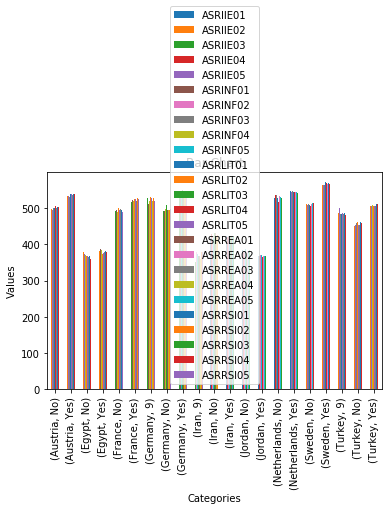

In [29]:
import matplotlib.pyplot as plt

pivot_df_multiplexreadingscore.plot(kind='bar')
plt.title('Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

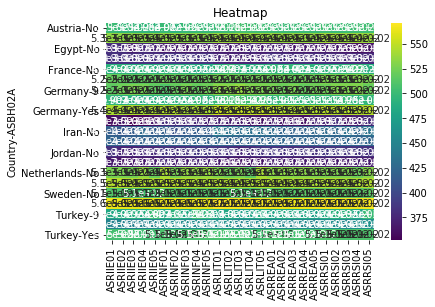

In [30]:
import seaborn as sns

sns.heatmap(pivot_df_multiplexreadingscore, annot=True, cmap='viridis')
plt.title('Heatmap')
plt.show()

I maybe want to get rid of the 9s? As they represent unanswered questions?

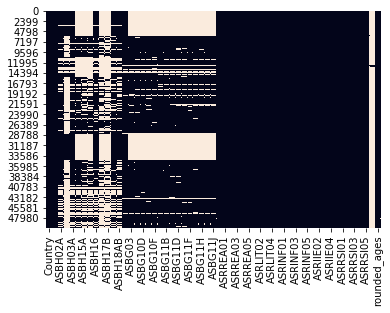

In [31]:
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
def rename_columns_for_presentation(df):
    column_mapping = {
        'col1': 'User_ID',
        'col2': 'Transaction_Date',
        'col3': 'Amount'
    }
    return df.rename(columns=column_mapping)

df.rename(columns={'IDCNTRY': 'Country', 
                   'ASBH02A':'BornInCountry',
                   'ASBH02B':'AgeArrival',
                   'ASBH03A':'CountryLanguageBeforeSchool',
                   'ASBH04':'CountryLanguageHome',
                   'ASBH15A':'EducationParentA',
                   'ASBH15B':'EducationParentB',
                   'ASBH16':'EducationHope',
                   'ASBH17A':'ParentAJob',
                   'ASBH17B':'ParentBJob',
                   'ASBH18AA':'ParentACountryLanguage',
                   'ASBH18AB':'ParentBCountryLanguage'}, inplace=True)